<a href="https://colab.research.google.com/github/2021-FIIT-Bc-projects/BP-Fagan-CNN-Huby/blob/develop/VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import tensorflow as tf
import os

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Colab Notebooks/dataset3/train'
valid_path = '/content/drive/MyDrive/Colab Notebooks/dataset3/test'

In [ ]:
class_names=os.listdir(train_path)
class_names_test=os.listdir(valid_path)

print(class_names)
print(class_names_test)

['E_Boletus_reticulatus', 'P_Amanita_pantherina', 'E_Macrolepiota_procera', 'P_Amanita_muscaria', 'E_Leccinum', 'E_Tricholomopsis_rutilans', 'E_Macrolepiota', 'E_Agaricus_augustus', 'P_Amanita_frostiana', 'E_Cantharellus_cibarius', 'P_Galerina_marginata', 'P_Amanita_phalloides', 'P_Gyromitra_esculenta']
['E_Agaricus_augustus', 'E_Boletus_reticulatus', 'E_Cantharellus_cibarius', 'E_Leccinum', 'E_Macrolepiota', 'E_Macrolepiota_procera', 'E_Tricholomopsis_rutilans', 'P_Amanita_frostiana', 'P_Amanita_muscaria', 'P_Amanita_pantherina', 'P_Amanita_phalloides', 'P_Galerina_marginata', 'P_Gyromitra_esculenta']


In [ ]:
vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

58900480/58889256 [==============================] - 1s 0us/step


In [ ]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/Colab Notebooks/dataset3/train/*')

In [ ]:
folders

['/content/drive/MyDrive/Colab Notebooks/dataset3/train/E_Boletus_reticulatus',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/P_Amanita_pantherina',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/E_Macrolepiota_procera',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/P_Amanita_muscaria',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/E_Leccinum',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/E_Tricholomopsis_rutilans',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/E_Macrolepiota',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/E_Agaricus_augustus',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/P_Amanita_frostiana',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/E_Cantharellus_cibarius',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/P_Galerina_marginata',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/P_Amanita_phalloides',
 '/content/drive/MyDrive/Colab Notebooks/dataset3/train/P_Gyr

In [ ]:
x = Flatten()(vgg16.output)

In [ ]:
len(folders)

13

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset3/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1317 images belonging to 13 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/dataset3/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 262 images belonging to 13 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
42/42 [==============================] - 1140s 26s/step - loss: 2.0667 - accuracy: 0.4450 - val_loss: 0.7664 - val_accuracy: 0.7634
Epoch 2/20
42/42 [==============================] - 27s 661ms/step - loss: 0.8188 - accuracy: 0.7441 - val_loss: 0.4266 - val_accuracy: 0.8855
Epoch 3/20
42/42 [==============================] - 27s 643ms/step - loss: 0.4863 - accuracy: 0.8610 - val_loss: 0.3038 - val_accuracy: 0.9275
Epoch 4/20
42/42 [==============================] - 27s 644ms/step - loss: 0.3901 - accuracy: 0.8808 - val_loss: 0.2247 - val_accuracy: 0.9427
Epoch 5/20
42/42 [==============================] - 27s 639ms/step - loss: 0.2826 - accuracy: 0.9301 - val_loss: 0.1355 - val_accuracy: 0.9656
Epoch 6/20
42/42 [==============================] - 27s 637ms/step - loss: 0.1727 - accuracy: 0.9658 - val_loss: 0.1321 - val_accuracy: 0.9809
Epoch 7/20
42/42 [==============================] - 27s 636ms/step - loss: 0.1570 - accuracy: 0.9658 - val_loss: 0.0649 - val_accuracy: 0.9962

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/models/model_13_vs_13_20epochs_100acc_100valacc')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/models/model_13_vs_13_20epochs_100acc_100valacc/assets


In [ ]:
model_loaded = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/models/model_13_vs_13_20epochs_100acc_100valacc')

In [ ]:
import pathlib
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/EKV2017-9217335_rJPOFaLoW.JPG" # muchotravka
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/EKV2017-9219519_H1Rkpasj-.JPG" # muchotravka
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/CUV2017-9224390_BJDKFy_hb.JPG" # muchotravka

#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/ARO2015-9190406_B1W-7TQRl.JPG" # dub
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/FDE2014PIC60764313.JPG" #dub
#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/APE2017-9196671_rk6iCYUEZ.JPG" # dub

#data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/Amanita_phalloides_test1.jpg" # muchotravka zelena
data_dir = "/content/drive/MyDrive/Colab Notebooks/tests/Cantharellus_cibarius_test1.jpg" # kuriatko jedle

image_path = pathlib.Path(data_dir)

img= tf.keras.utils.load_img(
    image_path, target_size=(224, 224)
)

img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(class_names)
print(predictions)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

['E_Boletus_reticulatus', 'P_Amanita_pantherina', 'E_Macrolepiota_procera', 'P_Amanita_muscaria', 'E_Leccinum', 'E_Tricholomopsis_rutilans', 'E_Macrolepiota', 'E_Agaricus_augustus', 'P_Amanita_frostiana', 'E_Cantharellus_cibarius', 'P_Galerina_marginata', 'P_Amanita_phalloides', 'P_Gyromitra_esculenta']
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
This image most likely belongs to E_Macrolepiota_procera with a 18.47 percent confidence.


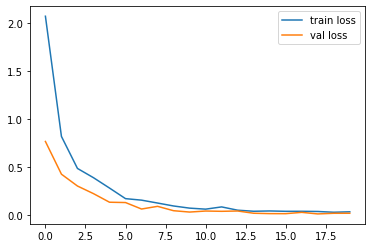

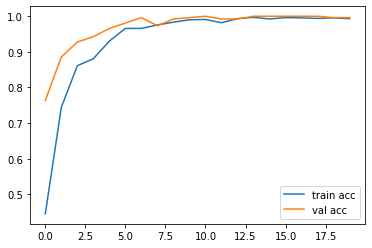

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
y_pred = model_loaded.predict(test_set)

In [ ]:
y_pred

array([[2.61436185e-07, 1.92757989e-06, 4.53007826e-10, ...,
        9.37890765e-10, 1.79383939e-08, 1.37970774e-10],
       [6.83726764e-09, 2.05041161e-07, 7.60581243e-05, ...,
        1.92144718e-08, 1.37788414e-09, 9.99892116e-01],
       [1.38192481e-05, 1.07632161e-06, 1.98736120e-06, ...,
        7.85453085e-06, 1.01472529e-06, 4.91521587e-06],
       ...,
       [1.60328746e-05, 2.29918835e-04, 4.26001975e-07, ...,
        2.87250696e-05, 1.23488064e-09, 4.41083466e-05],
       [9.08900976e-01, 2.86153052e-03, 6.88474276e-04, ...,
        1.35778566e-03, 3.72915565e-06, 1.12853246e-04],
       [6.32802994e-07, 2.57655520e-05, 5.88933518e-03, ...,
        3.89392699e-05, 9.68979001e-01, 4.33967711e-04]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([ 8, 12,  8, 10,  2,  1,  2, 10,  3,  1,  0,  8,  0,  8,  5,  2,  1,
       12,  2,  1,  1,  5,  5,  8,  6,  2,  9,  7,  5, 10,  8,  5,  1, 10,
        8, 12, 10,  9,  7,  2,  1, 12,  0, 11,  1, 11,  0,  4, 12,  8,  7,
        2,  8,  2,  3,  4,  1,  9,  1,  3,  2,  1, 10,  9,  8,  5,  5,  8,
        1,  4,  2,  9,  4,  8, 10,  4,  0,  7, 12,  1,  1,  5,  7,  2,  4,
       11, 12,  8,  1,  8,  1,  9,  8, 10,  8,  0, 11,  1, 10,  8,  1, 12,
        0, 12, 12,  2,  6, 10,  1, 11, 11,  2,  7,  2,  1,  7,  0,  6,  8,
       10, 10, 12,  8,  1,  7,  9,  5,  5,  4,  8, 11,  1,  8, 11,  0, 11,
       10,  7,  1, 10,  1,  5,  0,  1, 10,  5,  5, 10,  1, 12, 11,  8,  1,
        2,  6,  3,  6, 10,  1,  6,  1, 10, 12, 11,  1, 12,  8, 10,  8,  5,
       11,  8,  5,  8, 12,  4,  0, 12,  8, 10,  8,  8,  2,  2, 10,  2,  2,
        5,  8, 12,  2,  1,  1,  1, 12,  9,  7,  5,  2, 10,  0,  8, 10,  3,
       10,  7,  5,  5, 12,  8,  3,  2,  5, 12,  3,  5,  6,  4, 12,  2,  2,
        5,  2, 10,  8,  8

In [ ]:
len(y_pred)

262